In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np
import pandas as pd

In [8]:
df = pd.DataFrame(columns = ("q", "Intent"))
df["q"] = np.array([0.1, 0.2, 0.3, 0.4, 11, 13, 14, 15, 21, 23, 24, 25])
df["Intent"] = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])  #  0.790
#df["Intent"] = np.array([0, 1, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1])  #  -0.125
#df["Intent"] = np.array([ 1, 1,  2, 2, 0, 0, 1, 1,2, 2, 0, 0]) # -0.187
df["Intent"] = np.array([ 1, 2, 3, 4, 1, 1, 1, 1, 2, 2, 2, 2])

X = (df.q).values
X = X.reshape(-1, 1)
labels = df.Intent

silhouette_avg = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.148


In [41]:
df = pd.read_excel('rasa-generated-file_without_sno.xlsx')
df = pd.read_excel('res_search_rasa.xlsx')
df.head(50)

,q,Intent
0,"yep, will do thank you",affirm
1,I'm sure I will,affirm
2,ok i accept,affirm
3,show me chines restaurants in the north,restaurant_search
4,show me a mexican place in the centre,restaurant_search
5,i am looking for an indian spot called olaolao...,restaurant_search
6,search for restaurants,restaurant_search
7,I am looking a restaurant in 29432,restaurant_search
8,I am looking for some restaurants in Delhi.,restaurant_search
9,central indian restaurant,restaurant_search


In [4]:
#vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000,min_df=2, stop_words='english',use_idf=True)
vectorizer = TfidfVectorizer(min_df= 1, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
X = vectorizer.fit_transform(df.q).toarray()
labels = df.Intent

In [5]:
vectorizer.get_feature_names()

['29432',
 'accept',
 'afraid',
 'bunch',
 'called',
 'called olaolaolaolaolaola',
 'central',
 'central indian',
 'centre',
 'chines',
 'chines restaurants',
 'delhi',
 'don',
 'don think',
 'don want',
 'dont',
 'dont want',
 'eat',
 'emails',
 'indian',
 'indian restaurant',
 'indian spot',
 'looking',
 'looking indian',
 'looking place',
 'looking restaurant',
 'looking restaurants',
 'mexican',
 'mexican place',
 'nope',
 'nope dont',
 'north',
 'ok',
 'ok accept',
 'olaolaolaolaolaola',
 'place',
 'place centre',
 'place eat',
 'restaurant',
 'restaurant 29432',
 'restaurants',
 'restaurants delhi',
 'restaurants north',
 'search',
 'search restaurants',
 'spot',
 'spot called',
 'sure',
 'thank',
 'thanks',
 'thanks bunch',
 'think',
 'want',
 'want emails',
 'yep',
 'yep thank']

In [6]:
print("n_samples: %d, n_features: %d" % X.shape)
print(np.unique(labels))
print(np.unique(labels).shape)
print()

n_samples: 20, n_features: 56
['affirm' 'deny' 'restaurant_search' 'thank']
(4,)



In [7]:
#https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py
silhouette_avg = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels, metric='euclidean'))

Silhouette Coefficient: 0.054


In [31]:
print(X[:, 316])
X.shape

[0. 0. 0. ... 0. 0. 0.]


(2915, 317)

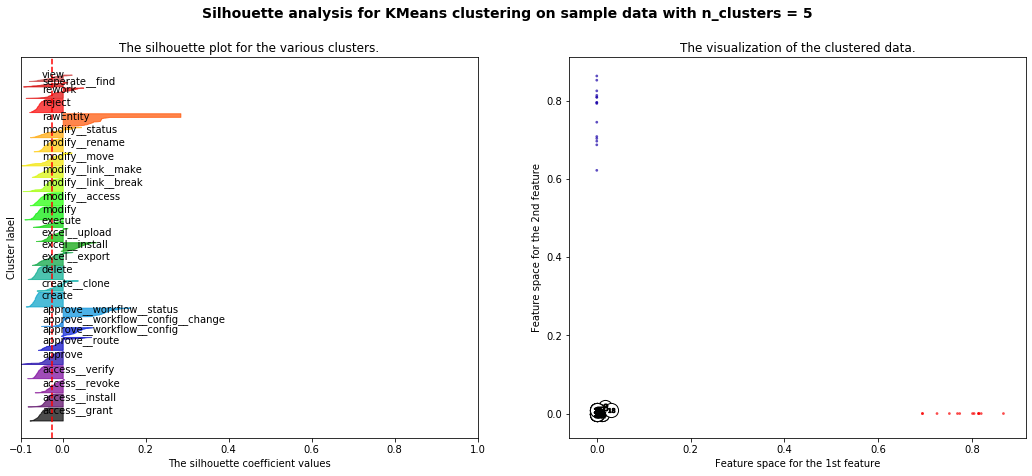

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

sample_silhouette_values = metrics.silhouette_samples(X, labels)

y_lower = 10
col = 0
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
#ax1.set_ylim([0, len(X) + (len(np.unique(labels)) + 1) * 10])

n_clusters = len(np.unique(labels))
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)
    
for i in (np.unique(labels)):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(col) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    col = col +1
    
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels_t = le.fit_transform(labels)

colors = cm.nipy_spectral(labels_t.astype(float) / n_clusters)
print(colors)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 5),
             fontsize=14, fontweight='bold')
plt.show()

In [13]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     D:\Users\618757\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [20]:
df = pd.read_excel('rasa-generated-file_without_sno.xlsx')
df = pd.read_excel('res_search_rasa.xlsx')
df.head()

,q,Intent
0,"yep, will do thank you",affirm
1,I'm sure I will,affirm
2,ok i accept,affirm
3,show me chines restaurants in the north,restaurant_search
4,show me a mexican place in the centre,restaurant_search


In [31]:
df.shape[0]

20

In [26]:
data = ["I love machine learning. Its awesome.",
        "I love coding in python",
        "I love building chatbots",
        "they chat amagingly well"]


tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(df.q)]
tagged_data

[TaggedDocument(words=['yep', ',', 'will', 'do', 'thank', 'you'], tags=['0']),
 TaggedDocument(words=['i', "'m", 'sure', 'i', 'will'], tags=['1']),
 TaggedDocument(words=['ok', 'i', 'accept'], tags=['2']),
 TaggedDocument(words=['show', 'me', 'chines', 'restaurants', 'in', 'the', 'north'], tags=['3']),
 TaggedDocument(words=['show', 'me', 'a', 'mexican', 'place', 'in', 'the', 'centre'], tags=['4']),
 TaggedDocument(words=['i', 'am', 'looking', 'for', 'an', 'indian', 'spot', 'called', 'olaolaolaolaolaola'], tags=['5']),
 TaggedDocument(words=['search', 'for', 'restaurants'], tags=['6']),
 TaggedDocument(words=['i', 'am', 'looking', 'a', 'restaurant', 'in', '29432'], tags=['7']),
 TaggedDocument(words=['i', 'am', 'looking', 'for', 'some', 'restaurants', 'in', 'delhi', '.'], tags=['8']),
 TaggedDocument(words=['central', 'indian', 'restaurant'], tags=['9']),
 TaggedDocument(words=['i', "'m", 'looking', 'for', 'a', 'place', 'to', 'eat'], tags=['10']),
 TaggedDocument(words=['i', 'do', 'not

In [28]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)


print(model.docvecs['16'])
print(model.docvecs['17'])
print('******')
for epoch in range(max_epochs):
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

print(model.docvecs['16'])
print(model.docvecs['17'])

[-0.00622244 -0.02454143 -0.01432983  0.02035559  0.00224594  0.00436569
  0.00560137  0.02386473 -0.01224232 -0.01535765 -0.02045181  0.00612158
  0.01897373  0.0062915  -0.01461133  0.01149528  0.00221828  0.0226259
  0.02122687 -0.0232824 ]
[ 0.00294852  0.019974    0.01177903 -0.02137804  0.01905767 -0.02261441
 -0.00880086 -0.02421517  0.01188051  0.00957513  0.02427376  0.00654597
  0.01434494 -0.01389626  0.01458358 -0.01075501 -0.02499392 -0.01924927
  0.02469472  0.01916642]
******


D:\Users\618757\Anaconda3\envs\tensorFlowEnv\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


[ 0.06274163 -0.505823   -0.30250737  0.8377802   0.2434829  -0.00996353
  0.13718837  0.50390494  0.07487288 -0.23163602  0.5318364  -0.06154248
  0.17487133 -0.4302535  -0.7708718  -0.21371569 -0.11276603  0.35938516
  0.74801785 -0.34927437]
[ 0.01994414 -0.25409743 -0.16216229  0.4641567   0.22979264  0.0009526
  0.07670971  0.20608026  0.08026527 -0.11101843  0.46243832 -0.03596682
  0.05442614 -0.332315   -0.4443363  -0.21963081 -0.13571572  0.13874297
  0.48981333 -0.12575562]


In [34]:
print(model.docvecs['16'])

[ 0.06274163 -0.505823   -0.30250737  0.8377802   0.2434829  -0.00996353
  0.13718837  0.50390494  0.07487288 -0.23163602  0.5318364  -0.06154248
  0.17487133 -0.4302535  -0.7708718  -0.21371569 -0.11276603  0.35938516
  0.74801785 -0.34927437]


In [35]:
infec_vector = []
for doc_id in range(df.shape[0]):
    #test_data = word_tokenize("My name is Abhi".lower())
    #v1 = model.infer_vector(test_data)
    infec_vector.append(model.docvecs[doc_id])

# to find most similar doc using tags
#similar_doc = model.docvecs.most_similar('1')
#print(similar_doc)


# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
#print(model.docvecs['1'])

In [42]:
similar_doc = model.docvecs.most_similar('16')
print(similar_doc)

[('17', 0.968804657459259), ('0', 0.9517542123794556), ('14', 0.9423664808273315), ('18', 0.915607213973999), ('9', 0.9096601009368896), ('2', 0.8955565094947815), ('12', 0.8931649923324585), ('13', 0.8922423124313354), ('15', 0.8900159001350403), ('6', 0.8890291452407837)]


In [40]:
infec_vector

[array([ 0.24027638, -0.4972915 , -0.16718557,  0.82725555,  0.3908737 ,
         0.00498619,  0.07340268,  0.24188133,  0.22268102, -0.16337094,
         0.60676014, -0.15567768, -0.06064021, -0.5354193 , -0.83907986,
        -0.30605766, -0.02108192,  0.11853462,  0.73137635, -0.38096988],
       dtype=float32),
 array([ 0.09051069, -0.3650486 , -0.22758166,  0.7152276 ,  0.39746043,
         0.24156524,  0.17882644,  0.12778126,  0.21240586, -0.32901046,
         0.6815421 , -0.2616313 , -0.2869276 , -0.59992594, -0.7112354 ,
        -0.21242389,  0.06371837,  0.3024009 ,  0.38553965, -0.07539599],
       dtype=float32),
 array([ 0.10756056, -0.37829682, -0.18588926,  1.0487585 ,  0.5043778 ,
         0.26070416,  0.10317931,  0.42153326, -0.14652593, -0.13058798,
         0.8146571 ,  0.10205278, -0.16632217, -0.5835675 , -0.75411123,
        -0.33193335, -0.05092913,  0.11285843,  0.45813516, -0.0904434 ],
       dtype=float32),
 array([-0.51113856, -0.1929939 , -0.5433697 ,  1.16

In [39]:
X = infec_vector
#X = X.reshape(-1, 1)
labels = df.Intent

silhouette_avg = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.020


In [43]:
labels

0                affirm
1                affirm
2                affirm
3     restaurant_search
4     restaurant_search
5     restaurant_search
6     restaurant_search
7     restaurant_search
8     restaurant_search
9     restaurant_search
10    restaurant_search
11                 deny
12                 deny
13                 deny
14                 deny
15                 deny
16                thank
17                thank
18                thank
19                thank
Name: Intent, dtype: object